In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('Data2.csv')
df

,x,y
0,0.1,5.764952e+01
1,0.2,4.740870e+01
2,0.3,6.946902e+01
3,0.4,3.755086e+01
4,0.5,7.860685e+01
...,...,...
95,9.6,3.636073e+05
96,9.7,8.819300e+05
97,9.8,1.053557e+06
98,9.9,4.503040e+05


In [60]:
d = 2

In [61]:
df.insert(0,"x0",1)

In [62]:
x1 = df['x']
y1 = df['y']
df['y'] = np.log(df['y'])

In [63]:
def Xi_V(index):
    return np.array((df.iloc[index][: d],)).T

In [64]:
def Xi_T_V(index):
    return np.array((df.iloc[index][: d],))

In [65]:
def Yi(index):
    return np.array(df.iloc[index][d:d + 1])

In [66]:
def XiYi_V(index):
    return Xi_V(index) * Yi(index)

In [67]:
zero_vector = np.array([[0.]*d]).T
zero_matrix = zero_vector*zero_vector.T

zero_matrix

array([[0., 0.],
       [0., 0.]])

In [68]:
def Sum_XiYi(df):
    s = zero_vector
    for i in range(len(df)):
        s += Xi_V(i) * Yi(i)[0]

    return s

In [69]:
def Sum_XiXiT(df):
    s = zero_matrix
    for i in range(len(df)):
        s += Xi_V(i) @ Xi_T_V(i)

    return s

In [70]:
matrix = Sum_XiXiT(df)
inverse_matrix = np.linalg.inv(matrix)
inverse_matrix

array([[ 0.04060606, -0.00606061],
       [-0.00606061,  0.00120012]])

In [71]:
w = np.matmul(inverse_matrix, Sum_XiYi(df))
w

array([[3.68212267],
       [0.97299745]])

In [72]:
def predict(X):
    return np.matmul(w.T , X)

In [73]:
def predicts(df):
    lst = []
    for i in range(len(df)):
        lst.append(list(predict(np.array((df.iloc[i][: d],)).T))[0][0])

    return np.array(lst)


In [74]:
predicted_value = np.array(predicts(df))

In [75]:
df['predicted'] = predicted_value

In [76]:
def Rss(df):
    return np.sum((df['y'] - df['predicted'])**2)

In [77]:
def Tss(df):
    return np.sum((df['y'] - np.mean(df['y']))**2)


In [78]:
def R2(df):
    return 1 - Rss(df) / Tss(df)

In [79]:
R2(df)

0.9904038522690993

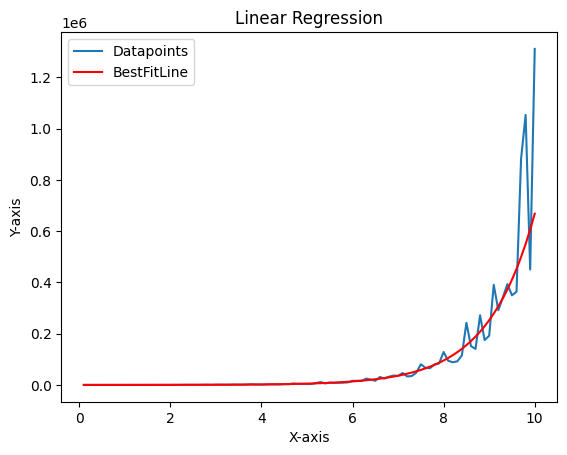

In [80]:
import matplotlib.pyplot as plt

x = x1
y = y1
y_predicted = np.exp(df['predicted'])

plt.plot(x, y, label='Datapoints')
plt.plot(x, y_predicted, label = 'BestFitLine' , color = 'Red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [81]:
LR = LinearRegression()

In [82]:
X =df.drop('y', axis = 1)
X = X.drop('predicted', axis=1)
y = df['y']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [84]:
x = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([y_train, y_test], axis=0)

In [85]:
LR.fit(X, Y)

LinearRegression()